<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Bagged_Trees_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bagged Trees

How Bagged Trees Work<br>
Here is how bagged trees work.<br>
<br>

Step 1. User specifies N.<br>

Step 2. Grow N trees using N bootstrap samples from the training data.<br>

Step 3. Make predictions.<br>

Step 4. Combine the predictions.<br>

- Average the predictions for regression trees.
- Majority vote for classification trees.<br>
<br>

With these steps in mind there are a few things for you to consider:

- Each bootstrap sample is typically the same size as the original training set (it will most likely contain repeated rows).
- N should be a large enough value that the error seems to have stabilized.
- The trees are grown deep so that they have low bias/high variance. This is different than individual decision trees where growing them less deep tends to lead to better results.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
df = pd.read_csv('/content/cali_housing (2).csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Arrange Data into Features Matrix and Target Vector
y = df['MedHouseVal']
X = df.drop(columns = 'MedHouseVal')
# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# This was already imported earlier so commenting it out
# from sklearn.ensemble import BaggingRegressor

In [ ]:
bagreg = BaggingRegressor(random_state = 42)

In [ ]:
# Look at the hyperparameters
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
bagreg.fit(X_train, y_train)
bagreg.predict(X_test)

array([0.5058  , 0.6723  , 4.908308, ..., 1.057   , 2.9243  , 4.2562  ])

In [ ]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9612123478289769
0.7893591786740191


In [ ]:
# List of estimator values
estimators = [10, 20, 30, 40, 50, 100]
# Data frame to store the scores
scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
# Iterate through the values to find the best number of estimators
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   train_score = bag_reg.score(X_train, y_train)
   test_score = bag_reg.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score

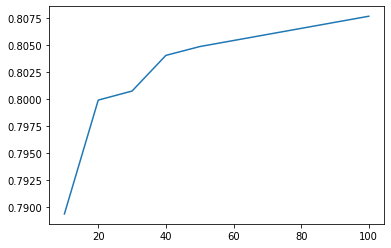

In [ ]:
# Plot the scores
plt.plot(scores['Test Score'])
plt.show()

In [ ]:
# Sort by test score
scores = scores.sort_values(by='Test Score', ascending=False)
scores

,Train Score,Test Score
100,0.972597,0.807639
50,0.971767,0.804834
40,0.97107,0.804019
30,0.969957,0.800722
20,0.967738,0.799884
10,0.961212,0.789359


In [ ]:
# Save the index value of the best test score.
best_n_estimators = scores.index[0]
# Instantiate and fit the best version of the model
bag_reg_tuned = BaggingRegressor(n_estimators=best_n_estimators,)
bag_reg_tuned.fit(X_train, y_train)
# Evaluate the model
print(bag_reg_tuned.score(X_train, y_train))
print(bag_reg_tuned.score(X_test, y_test))

0.9728691244129991
0.8080492853981023
